In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab 
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

from keras.losses import mean_absolute_percentage_error

In [5]:
# Load in data
data = pd.read_csv("./data (csv)/interval_results.csv")
final = pd.read_csv("./data (csv)/final_results.csv")
data = data.drop(['Unnamed: 0'], axis=1)
print(data.shape)
data.head()

(74732, 24)


,benchmark,year,size,memory,cycles,instructions,L1-dcache-loads,L1-dcache-load-misses,L1-dcache-stores,L1-dcache-store-misses,...,LLC-stores,LLC-store-misses,LLC-prefetches,LLC-prefetch-misses,dTLB-loads,dTLB-load-misses,dTLB-stores,dTLB-store-misses,iTLB-loads,iTLB-load-misses
0,perlbench,2017,test,2928,160960060,432730112,146415332,141381,41190446,58519,...,162,0,525,288,107894970,14,47207540,20,147,1
1,perlbench,2017,test,2928,389849233,1051996693,310911945,152949,91111827,62860,...,421,115,1362,299,319136439,20,128330109,28,819,4
2,perlbench,2017,test,2928,609008846,1644756091,447046584,162128,148757645,66175,...,546,115,1878,332,523292970,47,206012761,43,3260,9
3,perlbench,2017,test,2928,833982652,2229230545,537877405,443035,148757645,234924,...,576,203,2493,420,727235069,74,283676211,54,4035,13
4,perlbench,2017,test,2928,833982652,2229230545,537877405,443035,148757645,234924,...,576,203,2493,420,727235069,74,283676211,54,4035,13


In [6]:
def plotGraph(item, benchmark, year, size):
    sample = data[(data['benchmark']==benchmark) & (data['year']==year) & (data['size']==size)]
    plt.plot(sample['cycles'], sample[item])
    plt.xlabel('cycles', fontsize=14)
    plt.ylabel(item, fontsize=14)

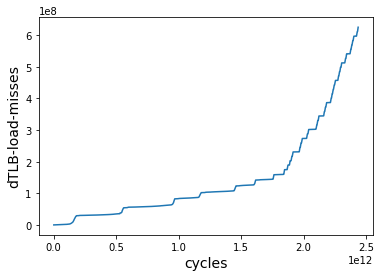

In [7]:
plotGraph('dTLB-load-misses', 'mcf', 2017, 'ref')

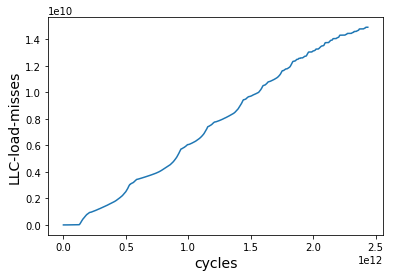

In [8]:
plotGraph('LLC-load-misses', 'mcf', 2017, 'ref')

In [9]:
# Format data
data = data.dropna()
y = data['instructions'] / data['cycles'] 
X = data.drop(['benchmark', 'year', 'size', 'memory', 'cycles', 'instructions', 'L1-dcache-prefetch-misses'], axis=1).astype(int)

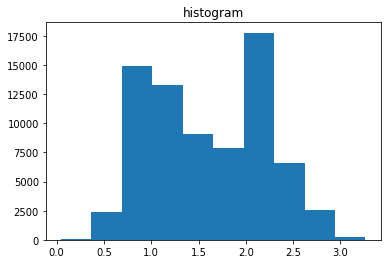

In [10]:
# Histogram of IPC
a = data['instructions'] / data['cycles']
plt.hist(a) 
plt.title("histogram") 
plt.show()

In [11]:
# Split data for regular testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [12]:
# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Linear regression as baseline
reg = LinearRegression().fit(X_train, y_train)
preds = reg.predict(X_test)
mean_squared_error(y_test, preds)

0.1523948145744714

In [13]:
# Random Forest Classifier
rf = RandomForestRegressor().fit(X_train, y_train)
preds = rf.predict(X_test)
mean_squared_error(y_test, preds)

0.0005916920917681436

In [18]:
# Create Neural Net model
model = Sequential()

# Add first layer
model.add(Dense(32, input_shape=(X.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add second layer
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add third layer
model.add(Dense(1)) # regression requires just 1 "class"
model.add(Activation('linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [19]:
# Train model
history = model.fit(X_train, y_train, batch_size=128,
                    epochs=200, verbose=1, validation_data=(X_test, y_test))

Train on 44839 samples, validate on 29893 samples
Epoch 1/200
44839/44839 [==============================] - 1s 18us/step - loss: 0.7131 - val_loss: 0.1452
Epoch 2/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.2927 - val_loss: 0.1074
Epoch 3/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.2307 - val_loss: 0.0930
Epoch 4/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.1977 - val_loss: 0.0846
Epoch 5/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.1679 - val_loss: 0.0786
Epoch 6/200
44839/44839 [==============================] - 0s 11us/step - loss: 0.1480 - val_loss: 0.0726
Epoch 7/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.1257 - val_loss: 0.0637
Epoch 8/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.1118 - val_loss: 0.0557
Epoch 9/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.0998 - val_loss: 0.0

44839/44839 [==============================] - 0s 11us/step - loss: 0.0337 - val_loss: 0.0156
Epoch 78/200
44839/44839 [==============================] - 0s 11us/step - loss: 0.0331 - val_loss: 0.0132
Epoch 79/200
44839/44839 [==============================] - 0s 11us/step - loss: 0.0329 - val_loss: 0.0132
Epoch 80/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.0322 - val_loss: 0.0153
Epoch 81/200
44839/44839 [==============================] - 1s 11us/step - loss: 0.0347 - val_loss: 0.0151
Epoch 82/200
44839/44839 [==============================] - 0s 11us/step - loss: 0.0334 - val_loss: 0.0137
Epoch 83/200
44839/44839 [==============================] - 1s 13us/step - loss: 0.0330 - val_loss: 0.0132
Epoch 84/200
44839/44839 [==============================] - 0s 11us/step - loss: 0.0334 - val_loss: 0.0113
Epoch 85/200
44839/44839 [==============================] - 0s 11us/step - loss: 0.0326 - val_loss: 0.0185
Epoch 86/200
44839/44839 [========================

44839/44839 [==============================] - 0s 10us/step - loss: 0.0311 - val_loss: 0.0134
Epoch 154/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.0313 - val_loss: 0.0145
Epoch 155/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.0320 - val_loss: 0.0138
Epoch 156/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.0310 - val_loss: 0.0116
Epoch 157/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.0319 - val_loss: 0.0154
Epoch 158/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.0314 - val_loss: 0.0117
Epoch 159/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.0310 - val_loss: 0.0133
Epoch 160/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.0310 - val_loss: 0.0117
Epoch 161/200
44839/44839 [==============================] - 0s 10us/step - loss: 0.0307 - val_loss: 0.0114
Epoch 162/200
44839/44839 [===============

KeyError: 'val_loss'

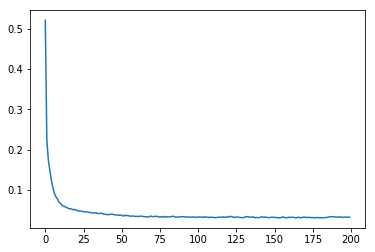

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred.flatten())

In [ ]:
np.mean(data['instructions'] / data['cycles'])

In [ ]:
######################################################################################################################

In [ ]:
# Experiment 1: different benchmarks for testing and training
def runExp12(benchmark1, benchmark2):
    X_train = data[(data['benchmark']!=benchmark1)&(data['benchmark']!=benchmark2)].drop(['benchmark', 'year', 'size', 'memory', 'cycles', 'instructions', 'L1-dcache-prefetch-misses'], axis=1).astype(int)
    X_test = data[(data['benchmark']==benchmark1)|(data['benchmark']==benchmark2)].drop(['benchmark', 'year', 'size', 'memory', 'cycles', 'instructions', 'L1-dcache-prefetch-misses'], axis=1).astype(int)
    y_train = data[(data['benchmark']!=benchmark1)&(data['benchmark']!=benchmark2)]['instructions'] / data[(data['benchmark']!=benchmark1)&(data['benchmark']!=benchmark2)]['cycles']
    y_test = data[(data['benchmark']==benchmark1)|(data['benchmark']==benchmark2)]['instructions'] / data[(data['benchmark']==benchmark1)|(data['benchmark']==benchmark2)]['cycles']
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    rf = RandomForestRegressor().fit(X_train, y_train)
    reg = LinearRegression().fit(X_train, y_train)
    # Create model
    model = Sequential()

    # Add first layer
    model.add(Dense(32, input_shape=(X.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Add second layer
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Add third layer
    model.add(Dense(1)) # regression requires just 1 "class"
    model.add(Activation('linear'))

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(X_train, y_train, batch_size=128,
                        epochs=200)
    X_test = sc.transform(X_test)
    lin_preds = reg.predict(X_test)
    print(mean_squared_error(y_test, lin_preds))
    rf_preds = rf.predict(X_test)
    print(mean_squared_error(y_test, rf_preds))
    y_pred = model.predict(X_test)
    print(mean_squared_error(y_test, y_pred.flatten()))
    
    

def runExp13(benchmark1, benchmark2, benchmark3):
    X_train = data[(data['benchmark']!=benchmark1)&(data['benchmark']!=benchmark2)&(data['benchmark']!=benchmark3)].drop(['benchmark', 'year', 'size', 'memory', 'cycles', 'instructions', 'L1-dcache-prefetch-misses'], axis=1).astype(int)
    X_test = data[(data['benchmark']==benchmark1)|(data['benchmark']==benchmark2)|(data['benchmark']==benchmark3)].drop(['benchmark', 'year', 'size', 'memory', 'cycles', 'instructions', 'L1-dcache-prefetch-misses'], axis=1).astype(int)
    y_train = data[(data['benchmark']!=benchmark1)&(data['benchmark']!=benchmark2)&(data['benchmark']!=benchmark3)]['instructions'] / data[(data['benchmark']!=benchmark1)&(data['benchmark']!=benchmark2)&(data['benchmark']!=benchmark3)]['cycles']
    y_test =data[(data['benchmark']==benchmark1)|(data['benchmark']==benchmark2)|(data['benchmark']==benchmark3)]['instructions'] / data[(data['benchmark']==benchmark1)|(data['benchmark']==benchmark2)|(data['benchmark']==benchmark3)]['cycles']
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    rf = RandomForestRegressor().fit(X_train, y_train)
    reg = LinearRegression().fit(X_train, y_train)
    # Create model
    model = Sequential()

    # Add first layer
    model.add(Dense(32, input_shape=(X.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Add second layer
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Add third layer
    model.add(Dense(1)) # regression requires just 1 "class"
    model.add(Activation('linear'))

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(X_train, y_train, batch_size=128,
                        epochs=200)
    X_test = sc.transform(X_test)
    lin_preds = reg.predict(X_test)
    print(mean_squared_error(y_test, lin_preds))
    rf_preds = rf.predict(X_test)
    print(mean_squared_error(y_test, rf_preds))
    y_pred = model.predict(X_test)
    print(mean_squared_error(y_test, y_pred.flatten()))

In [130]:
# Run experiment 1
twolist = [['fp', 'mcf'], ['libquantum', 'omnetpp'], ['gcc', 'sjeng'], ['astar', 'perlbench'], ['deepsjeng', 'leela']]
threelist = [['xalancbmk', 'bzip2', 'h264ref'], ['gobmk', 'hmmer', 'exchange2']]

for twos in twolist:
    print(twos)
    runExp12(twos[0], twos[1])
    
for threes in threelist:
    print(threes)
    runExp13(threes[0], threes[1], threes[2])

['fp', 'mcf']
Epoch 1/200
62743/62743 [==============================] - 1s 17us/step - loss: 0.6821
Epoch 2/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.2052
Epoch 3/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.1507
Epoch 4/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.1200
Epoch 5/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.1017
Epoch 6/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0870
Epoch 7/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0747
Epoch 8/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0647
Epoch 9/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0583
Epoch 10/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0541
Epoch 11/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0514
Epoch 12/200
62743/62743 [===========

Epoch 95/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0243
Epoch 96/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0242
Epoch 97/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0236
Epoch 98/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0245
Epoch 99/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0238
Epoch 100/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0248
Epoch 101/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0238
Epoch 102/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0245
Epoch 103/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0241
Epoch 104/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0231
Epoch 105/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0247
Epoch 106/200
62743/62743 [==========

62743/62743 [==============================] - 1s 9us/step - loss: 0.0224
Epoch 189/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0227
Epoch 190/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0220
Epoch 191/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0229
Epoch 192/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0232
Epoch 193/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0228
Epoch 194/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0227
Epoch 195/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0230
Epoch 196/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0220
Epoch 197/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0220
Epoch 198/200
62743/62743 [==============================] - 1s 9us/step - loss: 0.0234
Epoch 199/200
62743/62743 [===================

65408/65408 [==============================] - 1s 9us/step - loss: 0.0290
Epoch 174/200
65408/65408 [==============================] - 1s 9us/step - loss: 0.0291
Epoch 175/200
65408/65408 [==============================] - 1s 9us/step - loss: 0.0293
Epoch 176/200
65408/65408 [==============================] - 1s 9us/step - loss: 0.0302
Epoch 177/200
65408/65408 [==============================] - 1s 9us/step - loss: 0.0291
Epoch 178/200
65408/65408 [==============================] - 1s 9us/step - loss: 0.0283
Epoch 179/200
65408/65408 [==============================] - 1s 9us/step - loss: 0.0287
Epoch 180/200
65408/65408 [==============================] - 1s 9us/step - loss: 0.0303
Epoch 181/200
65408/65408 [==============================] - 1s 10us/step - loss: 0.0284
Epoch 182/200
65408/65408 [==============================] - 1s 9us/step - loss: 0.0281
Epoch 183/200
65408/65408 [==============================] - 1s 9us/step - loss: 0.0286
Epoch 184/200
65408/65408 [==================

62094/62094 [==============================] - 1s 9us/step - loss: 0.0323
Epoch 158/200
62094/62094 [==============================] - 1s 9us/step - loss: 0.0332
Epoch 159/200
62094/62094 [==============================] - 1s 9us/step - loss: 0.0337
Epoch 160/200
62094/62094 [==============================] - 1s 9us/step - loss: 0.0332
Epoch 161/200
62094/62094 [==============================] - 1s 9us/step - loss: 0.0324
Epoch 162/200
62094/62094 [==============================] - 1s 9us/step - loss: 0.0338
Epoch 163/200
62094/62094 [==============================] - 1s 9us/step - loss: 0.0328
Epoch 164/200
62094/62094 [==============================] - 1s 9us/step - loss: 0.0339
Epoch 165/200
62094/62094 [==============================] - 1s 9us/step - loss: 0.0329
Epoch 166/200
62094/62094 [==============================] - 1s 9us/step - loss: 0.0334
Epoch 167/200
62094/62094 [==============================] - 1s 9us/step - loss: 0.0331
Epoch 168/200
62094/62094 [===================

Epoch 142/200
68139/68139 [==============================] - 1s 10us/step - loss: 0.0314
Epoch 143/200
68139/68139 [==============================] - 1s 11us/step - loss: 0.0301
Epoch 144/200
68139/68139 [==============================] - 1s 10us/step - loss: 0.0302
Epoch 145/200
68139/68139 [==============================] - 1s 10us/step - loss: 0.0297
Epoch 146/200
68139/68139 [==============================] - 1s 9us/step - loss: 0.0297
Epoch 147/200
68139/68139 [==============================] - 1s 9us/step - loss: 0.0287
Epoch 148/200
68139/68139 [==============================] - 1s 9us/step - loss: 0.0294
Epoch 149/200
68139/68139 [==============================] - 1s 9us/step - loss: 0.0293
Epoch 150/200
68139/68139 [==============================] - 1s 11us/step - loss: 0.0293
Epoch 151/200
68139/68139 [==============================] - 1s 10us/step - loss: 0.0289
Epoch 152/200
68139/68139 [==============================] - 1s 10us/step - loss: 0.0287
Epoch 153/200
68139/68139

72993/72993 [==============================] - 1s 10us/step - loss: 0.0300
Epoch 35/200
72993/72993 [==============================] - 1s 9us/step - loss: 0.0302
Epoch 36/200
72993/72993 [==============================] - 1s 9us/step - loss: 0.0291
Epoch 37/200
72993/72993 [==============================] - 1s 9us/step - loss: 0.0293
Epoch 38/200
72993/72993 [==============================] - 1s 9us/step - loss: 0.0289
Epoch 39/200
72993/72993 [==============================] - 1s 10us/step - loss: 0.0284
Epoch 40/200
72993/72993 [==============================] - 1s 10us/step - loss: 0.0291
Epoch 41/200
72993/72993 [==============================] - 1s 10us/step - loss: 0.0290
Epoch 42/200
72993/72993 [==============================] - 1s 10us/step - loss: 0.0296
Epoch 43/200
72993/72993 [==============================] - 1s 9us/step - loss: 0.0293
Epoch 44/200
72993/72993 [==============================] - 1s 9us/step - loss: 0.0289
Epoch 45/200
72993/72993 [=========================

61316/61316 [==============================] - 1s 10us/step - loss: 0.0447
Epoch 20/200
61316/61316 [==============================] - 1s 9us/step - loss: 0.0433
Epoch 21/200
61316/61316 [==============================] - 1s 9us/step - loss: 0.0422
Epoch 22/200
61316/61316 [==============================] - 1s 10us/step - loss: 0.0404
Epoch 23/200
61316/61316 [==============================] - 1s 10us/step - loss: 0.0398
Epoch 24/200
61316/61316 [==============================] - 1s 9us/step - loss: 0.0386
Epoch 25/200
61316/61316 [==============================] - 1s 9us/step - loss: 0.0383
Epoch 26/200
61316/61316 [==============================] - 1s 10us/step - loss: 0.0365
Epoch 27/200
61316/61316 [==============================] - 1s 10us/step - loss: 0.0353
Epoch 28/200
61316/61316 [==============================] - 1s 10us/step - loss: 0.0351
Epoch 29/200
61316/61316 [==============================] - 1s 10us/step - loss: 0.0368
Epoch 30/200
61316/61316 [=======================

55699/55699 [==============================] - 1s 11us/step - loss: 0.1402
Epoch 4/200
55699/55699 [==============================] - 1s 10us/step - loss: 0.1159
Epoch 5/200
55699/55699 [==============================] - 1s 10us/step - loss: 0.0982
Epoch 6/200
55699/55699 [==============================] - 1s 9us/step - loss: 0.0865
Epoch 7/200
55699/55699 [==============================] - 1s 9us/step - loss: 0.0782
Epoch 8/200
55699/55699 [==============================] - 1s 9us/step - loss: 0.0724
Epoch 9/200
55699/55699 [==============================] - 1s 10us/step - loss: 0.0671
Epoch 10/200
55699/55699 [==============================] - 1s 9us/step - loss: 0.0643
Epoch 11/200
55699/55699 [==============================] - 1s 9us/step - loss: 0.0591
Epoch 12/200
55699/55699 [==============================] - 1s 9us/step - loss: 0.0560
Epoch 13/200
55699/55699 [==============================] - 1s 9us/step - loss: 0.0526
Epoch 14/200
55699/55699 [==============================] 

55699/55699 [==============================] - 1s 11us/step - loss: 0.0308
Epoch 189/200
55699/55699 [==============================] - 1s 10us/step - loss: 0.0300
Epoch 190/200
55699/55699 [==============================] - 1s 10us/step - loss: 0.0303
Epoch 191/200
55699/55699 [==============================] - 1s 10us/step - loss: 0.0304
Epoch 192/200
55699/55699 [==============================] - 1s 11us/step - loss: 0.0312
Epoch 193/200
55699/55699 [==============================] - 1s 11us/step - loss: 0.0298
Epoch 194/200
55699/55699 [==============================] - 1s 10us/step - loss: 0.0304
Epoch 195/200
55699/55699 [==============================] - 1s 10us/step - loss: 0.0305
Epoch 196/200
55699/55699 [==============================] - 1s 10us/step - loss: 0.0298
Epoch 197/200
55699/55699 [==============================] - 1s 10us/step - loss: 0.0306
Epoch 198/200
55699/55699 [==============================] - 1s 10us/step - loss: 0.0306
Epoch 199/200
55699/55699 [========

In [115]:
# Experiment 2: train on 'ref' and test on 'test' and 'train' for each benchmark
def runExp2(benchmark, year):
    X_test = data[(data['size']!='ref')&(data['benchmark']==benchmark)&(data['year']==year)].drop(['benchmark', 'year', 'size', 'memory', 'cycles', 'instructions', 'L1-dcache-prefetch-misses'], axis=1).astype(int)
    y_test = data[(data['size']!='ref')&(data['benchmark']==benchmark)&(data['year']==year)]['instructions'] / data[(data['size']!='ref')&(data['benchmark']==benchmark)&(data['year']==year)]['cycles']
    X_test = sc.transform(X_test)
    lin_preds = reg.predict(X_test)
    print(mean_squared_error(y_test, lin_preds))
    rf_preds = rf.predict(X_test)
    print(mean_squared_error(y_test, rf_preds))
    y_pred = model.predict(X_test)
    print(mean_squared_error(y_test, y_pred.flatten()))

In [118]:
# Run Experiment 2
year = 2017
for benchmark in ['perlbench', 'gcc', 'mcf', 'omnetpp', 'xalancbmk', 'deepsjeng', 'leela', 'exchange2', 'fp']:
    print(benchmark)
    print(year)
    runExp2(benchmark, year)
    
year = 2006
for benchmark in ['perlbench', 'bzip2', 'gcc', 'gobmk', 'hmmer', 'sjeng', 'h264ref', 'astar', 'omnetpp', 'libquantum', 'mcf']:
    print(benchmark)
    print(year)
    runExp2(benchmark, year)

perlbench
2017
0.8029353089000179
0.32805605747025335
0.8815343546519622
gcc
2017
0.005550347231433918
0.05601405136321615
0.08579612933992078
mcf
2017
0.5593367741503098
0.8463426679530224
0.007512329687789915
omnetpp
2017
0.3080985285034185
0.0006487497046105236
0.0069251306934266345
xalancbmk
2017
0.2812184678958795
0.023434250810233218
0.0745533370225974
deepsjeng
2017
0.21547059975625993
0.24140425133755597
0.2834598221125204
leela
2017
0.10708945323140748
0.8838646973825586
0.750907768820328
exchange2
2017
0.31365525854616544
0.00022544558806185616
0.05196594502757291
fp
2017
0.93782693420357
1.9100222543127707
0.319977276307206
perlbench
2006
0.4555837645800316
0.12159374058745946
0.42791850509165236
bzip2
2006
0.029283429582773513
0.24447410426021696
0.08842596522445574
gcc
2006
0.014811125464410692
0.023366848273003744
0.07937292695374583
gobmk
2006
0.07458997639018902
0.03249073422548369
0.021642723427628408
hmmer
2006
0.33664714313700367
0.018524861171887404
0.10853672332332

In [36]:
# Experiment 3: different percentages of start and end for different benchmarks

#['perlbench', 'gcc', 'mcf', 'omnetpp', 'xalancbmk', 'deepsjeng', 'leela', 'exchange2', 'fp', 'bzip2', 'gobmk', 'hmmer', 'sjeng', 'h264ref', 'astar', 'libquantum']
train = pd.DataFrame(columns=data.columns.values)
for benchmark in ['perlbench', 'gcc', 'mcf', 'omnetpp', 'xalancbmk', 'deepsjeng', 'leela', 'exchange2', 'fp', 'bzip2', 'gobmk', 'hmmer', 'sjeng', 'h264ref', 'astar', 'libquantum']:
    for size in ['ref', 'train', 'test']:
        percent = 0.8
        benchmark_data = data[(data['benchmark']==benchmark)&(data['size']==size)]
        nrows = int(benchmark_data.shape[0] * percent)
        train = train.append(benchmark_data[:nrows])

X_train = train.drop(['benchmark', 'year', 'size', 'memory', 'cycles', 'instructions', 'L1-dcache-prefetch-misses'], axis=1).astype(int)
y_train = train['instructions'] / train['cycles']

test = pd.DataFrame(columns=data.columns.values)
for benchmark in ['perlbench', 'gcc', 'mcf', 'omnetpp', 'xalancbmk', 'deepsjeng', 'leela', 'exchange2', 'fp', 'bzip2', 'gobmk', 'hmmer', 'sjeng', 'h264ref', 'astar', 'libquantum']:
    for size in ['ref', 'train', 'test']:
        percent = 0.9
        benchmark_data = data[(data['benchmark']==benchmark)&(data['size']==size)]
        nrows = int(benchmark_data.shape[0] * percent)
        test = test.append(benchmark_data[nrows:])

X_test = test.drop(['benchmark', 'year', 'size', 'memory', 'cycles', 'instructions', 'L1-dcache-prefetch-misses'], axis=1).astype(int)
y_test = test['instructions'] / test['cycles']   